### K-means 사용할 때 최적의 군집 갯수.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### 다음 물음에 Python코드를 제시하여 답하세요.

In [2]:
# 데이터를 시뮬레이션 방법으로 구한다.
# 8 차원 공간에서 3개의 군집.
# 직접 시각화 하기 어렵다!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

In [3]:
X

array([[ -8.57489393,  -8.9993319 ,   2.55044022, ...,   9.34474989,
          4.69204028,   1.37710201],
       [ -3.10137732,  -0.60964963,  -5.25055123, ..., -10.49773092,
         -0.21619367,   2.01091436],
       [  3.25936219,  -2.21498438,  -7.63210675, ...,  -2.29622367,
         10.89939335,  -0.25918109],
       ...,
       [ -2.35140914,  -1.14627793,  -2.64047991, ...,  -9.27345005,
          0.62214666,   5.19270125],
       [  1.36856269,  -1.45310647,  -1.35460618, ...,  -9.42199071,
         -3.51739944,   5.33433668],
       [  5.35391298,   0.91939455,  -5.51222289, ...,  -5.26182222,
         10.46757725,   0.48577528]])

In [4]:
label

array([2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0])

1). "Total internal sum of squares"를 계산해 주는 함수 정의
- X         :   데이터.
- centers   :   군집의 중심점 (centroid)의 좌표를 나타내는 배열. kmeans의 출력.
- clusters  :   군집 레이블 어레이. kmeans의 출력. <br> <br>

In [3]:
def total_internal_ss(X, centers, clusters):
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    closest_centers = np.zeros((N_rows, N_columns))
    for n in range(N_clusters):
        indices = (clusters == n)
        for j in range(N_columns):
            closest_centers[indices,j] = centers[n,j]             # 개개 관측치에서 가장 가까운 위치의 군집 중심 (centroid).
    return np.sum((X-closest_centers)**2.0)

2). "Total internal sum of squares" 대 군집의 수를 산점도로 시각화 해 보세요.

In [4]:
n_cluster = range(2,10)                   # 군집 갯수에 해당하는 배열.
total_ss = []                             # "total internal sum of squares"에 해당하는 배열.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss += [total_internal_ss(X,centers,clusters)]

In [9]:
centers

array([[-2.35409092, -1.76584148, -3.9948154 ,  4.29570962, -0.11583816,
        -8.750376  , -1.52017331,  3.29121399],
       [-5.37348353, -5.97588338, -0.52304853,  0.0799211 ,  1.37988376,
         6.77886256,  5.10104581,  1.72833119],
       [ 3.20892022, -4.77729891, -5.45748475,  1.2932159 ,  5.32507763,
        -1.00922632,  9.75574738,  2.95686017],
       [ 5.02801726, -4.02406898, -5.37997616, -0.01520953,  2.61354742,
        -3.12856886,  9.13324368,  4.15643289],
       [ 1.87180808, -2.0604805 , -1.28666469,  4.31215286, -2.16335607,
        -7.04311149, -1.73911067,  3.83903021],
       [-6.4499266 , -7.12654571,  1.59527723,  0.2953678 ,  3.35992611,
         8.25023876,  2.89235068,  2.53086127],
       [ 0.06758758, -2.32138644, -3.24053123,  5.70659254, -1.69251892,
        -9.12527157, -2.10700811,  7.28369034],
       [-7.16187022, -7.25725182,  1.70766129,  1.90121766,  3.65231703,
         5.33109859,  5.7053324 ,  0.67346089],
       [-0.88559277, -1.42148923

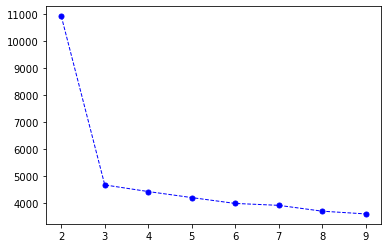

In [5]:
plt.plot(n_cluster,total_ss,color='blue',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()

In [6]:
#
# 위에서 정의한 함수가 아닌 객체의 inertia_ 속성을 사용해서 간편하게 계산할 수 있다!!!
#
n_cluster = range(2,10)                  # 군집 갯수에 해당하는 리스트.
total_ss = []                            # "total internal sum of squares"에 해당하는 리스트.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    total_ss.append(kmeans.inertia_)      # kmeans의 inertia_ 속성이 바로 "Total Internal SS"!!!

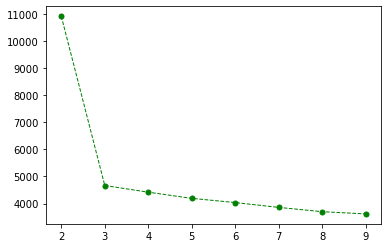

In [7]:
plt.plot(n_cluster,total_ss,color='green',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()